In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
from sklearn.decomposition import PCA

## Load Data

In [2]:
%%capture

# This runs the data_cleaning jupyter notebook,
# giving us accessing to variables created over there.
# NOTE: '%%capture' suppresses output
%run data_cleaning.ipynb

In [28]:
# We have now loaded top_df, full_df, and meta_df

display(
    'top_df (head)', f"shape: {top_df.shape}",
    top_df.head(n=3))

display(
    'meta_df (head)', f"shape: {meta_df.shape}",
    meta_df.head(n=3))

'top_df (head)'

'shape: (319, 14)'

,run_id,name,namespace,read_percent,region,zone,depth_(m),temp_(c),chlorophyl_(mg_chl/m3),nitrate_(µmol/l),oxygen_(µmol/kg),salinity_(psu),lat,long
0,ERR599104,catalytic activity,molecular_function,0.066795,Southern Ocean (near Antarctica),deep chlorophyll maximum layer,90,-0.78154,0.540091,33.109231,325.402987,34.319478,-62.2231,-49.2139
1,ERR599104,oxidation-reduction process,biological_process,0.058572,Southern Ocean (near Antarctica),deep chlorophyll maximum layer,90,-0.78154,0.540091,33.109231,325.402987,34.319478,-62.2231,-49.2139
2,ERR599104,ATP binding,molecular_function,0.054929,Southern Ocean (near Antarctica),deep chlorophyll maximum layer,90,-0.78154,0.540091,33.109231,325.402987,34.319478,-62.2231,-49.2139


'meta_df (head)'

'shape: (11, 12)'

,region,run_id,filename,zone,depth_(m),temp_(c),chlorophyl_(mg_chl/m3),nitrate_(µmol/l),oxygen_(µmol/kg),salinity_(psu),lat,long
0,Southern Ocean (near Antarctica),ERR599104,ERR599104_MERGED_FASTQ_GO.csv,deep chlorophyll maximum layer,90,-0.78154,0.540091,33.109231,325.402987,34.319478,-62.2231,-49.2139
1,Southern Ocean (near Antarctica),ERR599090,ERR599090_MERGED_FASTQ_GO.csv,surface water layer,5,0.67108,0.065273,27.501159,343.437300,34.353880,-62.0385,-49.5290
2,Southern Ocean (near Antarctica),ERR599008,ERR599008_MERGED_FASTQ_GO.csv,mesopelagic zone,790,0.45883,0.010087,38.821249,203.839400,34.679960,-61.9689,-49.5017


## More Data Prep 

In [4]:
# Rearrange data

df = top_df.pivot(
    index='run_id', columns='name',
    values='read_percent')

df.head()

name,ATP binding,ATPase activity,DNA binding,DNA replication,GTP binding,RNA binding,aminoacyl-tRNA ligase activity,biosynthetic process,carbohydrate metabolic process,catalytic activity,...,oxidoreductase activity,"oxidoreductase activity, acting on ...",protein binding,proteolysis,pyridoxal phosphate binding,ribosome,structural constituent of ribosome,tRNA aminoacylation for protein tra...,translation,transport
run_id,,,,,,,,,,,,,,,,,,,,,
ERR598948,0.054676,0.005978,0.020949,0.005743,0.006697,0.007409,0.009832,0.012449,0.009573,0.067951,...,0.027205,0.006679,0.010616,0.008563,0.014734,0.010300,0.010406,0.009564,0.010408,0.015223
ERR598980,0.051896,0.006241,0.019473,0.004795,0.006632,0.006670,0.009378,0.011707,0.008987,0.078939,...,0.032080,0.006873,0.013605,0.007893,0.018113,0.009711,0.009797,0.009156,0.009796,0.014267
ERR598992,0.056190,0.005844,0.020239,0.005770,0.007168,0.007577,0.010227,0.012785,0.009623,0.067138,...,0.025261,0.006759,0.009370,0.008689,0.014446,0.011087,0.011212,0.009905,0.011214,0.014048
ERR598995,0.056112,0.006044,0.021562,0.007172,0.006722,0.007755,0.009812,0.013339,0.010523,0.068905,...,0.026961,0.006492,0.013317,0.008915,0.015153,0.010346,0.010452,0.009595,0.010453,0.012943
ERR598999,0.052368,0.006248,0.020241,0.004759,0.006666,0.006823,0.009381,0.011954,0.009355,0.076456,...,0.030489,0.006671,0.012633,0.007935,0.017513,0.010129,0.010241,0.009164,0.010237,0.014694


In [5]:
## This prepares lists so that run_ids can be mapped to metadata

meta = meta_df.copy(deep=True)
meta.drop('filename', axis=1, inplace=True)
meta.set_index('run_id', inplace=True)
mapping_dict = meta.to_dict()

ids = df.reset_index()['run_id']

region_names = ids.map(mapping_dict['region'])
region_names = region_names.astype('category');
region_codes = region_names.cat.codes

zone_names = ids.map(mapping_dict['zone'])
zone_names = zone_names.astype('category');
zone_codes = zone_names.cat.codes

depth = ids.map(mapping_dict['depth_(m)'])
temp = ids.map(mapping_dict['temp_(c)'])
nitrate = ids.map(mapping_dict['nitrate_(µmol/l)'])
chlor = ids.map(mapping_dict['chlorophyl_(mg_chl/m3)'])
oxy = ids.map(mapping_dict['oxygen_(µmol/kg)'])
sal = ids.map(mapping_dict['salinity_(psu)'])

## PCA Plots

In [6]:
data = df.as_matrix()
pca = PCA(n_components=2)
projected = pca.fit_transform(data)

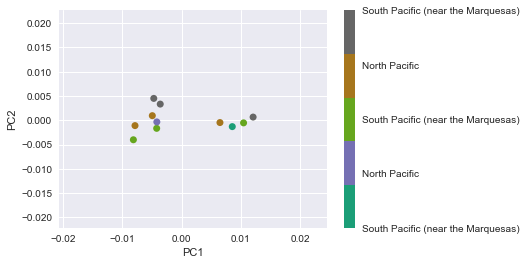

In [7]:
plt.scatter(
    projected[:, 0], projected[:, 1],
    c=region_codes, edgecolor='none', alpha=1,
    cmap=plt.cm.get_cmap('Dark2',5))
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
cbar.set_ticks(np.arange(5))
cbar.ax.set_yticklabels(region_names);

# plt.savefig('../imgs/pca/pca_1_region.png', bbox_inches='tight', dpi=250)

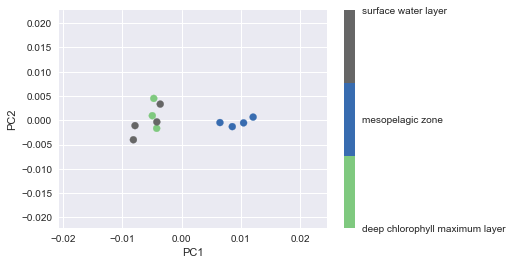

In [8]:
plt.scatter(
    projected[:, 0], projected[:, 1],
    c=zone_codes,
    cmap=plt.cm.get_cmap('Accent',3))

plt.xlabel('PC1')
plt.ylabel('PC2')

cbar = plt.colorbar()
cbar.set_ticks(np.arange(3))
cbar.ax.set_yticklabels(zone_names);
# plt.savefig('../imgs/pca/pca_2_zone.png',bbox_inches='tight', dpi=250)

In [9]:
# fig, (ax1, ax2) = plt.subplots(2, sharex=True)

# sc1 = ax1.scatter(
#     projected[:, 0], projected[:, 1],
#     c=region_codes, edgecolor='none', alpha=1,
#     cmap=plt.cm.get_cmap('Accent',5))

# cbar1= fig.colorbar(
#     sc1, ax=ax1,
#     ticks=np.arange(5))
# cbar1.ax.set_yticklabels(region_names)

# # ax1.legend(())

# sc2 = ax2.scatter(
#     projected[:, 0], projected[:, 1],
#     c=zone_codes, edgecolor='none', alpha=1,
#     cmap=plt.cm.get_cmap('Accent',3))

# cbar2 = fig.colorbar(
#     sc2, ax=ax2,
#     ticks=np.arange(3))
# cbar2.ax.set_yticklabels(zone_names)

In [13]:
x, y = projected[:, 0], projected[:, 1]

some_data = {
    'pc1':x, 'pc2':y,
    'zone_names':zone_names, 'zone_codes':zone_codes,
    'region_names':region_names,'region_codes':region_codes,
}

new_df = pd.DataFrame(data=some_data)

new_df

,pc1,pc2,region_codes,region_names,zone_codes,zone_names
0,-0.004941,0.000947,3,South Pacific (near the Marquesas),0,deep chlorophyll maximum layer
1,0.010476,-0.000536,2,North Pacific,1,mesopelagic zone
2,-0.007864,-0.001101,3,South Pacific (near the Marquesas),2,surface water layer
3,-0.004205,-0.001664,2,North Pacific,0,deep chlorophyll maximum layer
4,0.006487,-0.000472,3,South Pacific (near the Marquesas),1,mesopelagic zone
5,0.012088,0.000657,4,Southern Ocean (near Antarctica),1,mesopelagic zone
6,0.008569,-0.001308,0,Arabian Sea,1,mesopelagic zone
7,-0.004177,-0.000340,1,North Atlantic (off the coast of Portugal),2,surface water layer
8,-0.003602,0.003330,4,Southern Ocean (near Antarctica),2,surface water layer
9,-0.004694,0.004503,4,Southern Ocean (near Antarctica),0,deep chlorophyll maximum layer


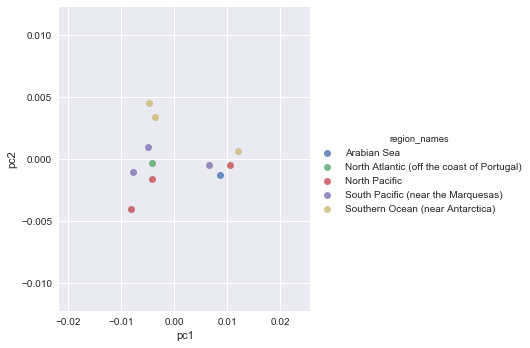

In [29]:
g = sns.lmplot(
    'pc1','pc2', data=new_df,
    fit_reg=False, hue='region_names')

ax1 = g.fig.get_axes()

In [ ]:
g.

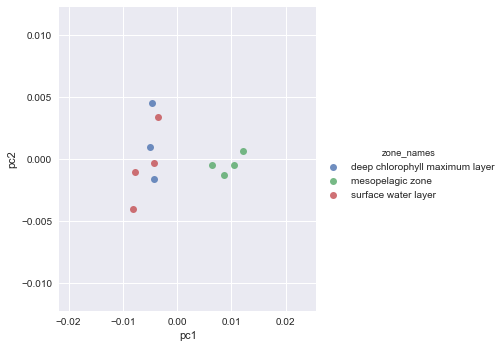

In [15]:
g = sns.lmplot(
    'pc1','pc2', data=new_df,
    fit_reg=False, hue='zone_names')

ax2 = g.fig.get_axes()

## Different

In [17]:
data = df.as_matrix()
pca = PCA(n_components=1)
projected = pca.fit_transform(data)

In [18]:
projected.shape

(11, 1)

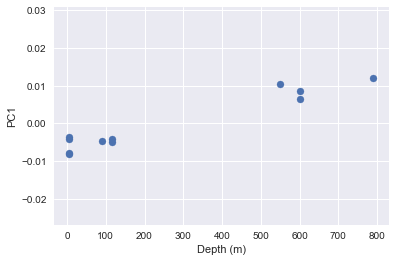

In [19]:
plt.scatter(x=depth, y=projected)
plt.xlabel('Depth (m)')
plt.ylabel('PC1')
# cbar = plt.colorbar()
# cbar.set_ticks(np.arange(5))
# cbar.ax.set_yticklabels(region_names)

In [20]:
pair_df = pd.DataFrame(projected, columns=['PC'])
pair_df['temp'] = temp
pair_df['depth'] = depth
pair_df['nitrate'] = nitrate
pair_df['zone'] = zone_names

In [21]:
pair_df

,PC,temp,depth,nitrate,zone
0,-0.004941,24.696250,115,2.333576,deep chlorophyll maximum layer
1,0.010476,6.689724,550,29.094100,mesopelagic zone
2,-0.007864,26.544130,5,3.986359,surface water layer
3,-0.004205,15.284298,115,0.732507,deep chlorophyll maximum layer
4,0.006487,7.212238,600,42.532050,mesopelagic zone
5,0.012088,0.458830,790,38.821249,mesopelagic zone
6,0.008569,12.066048,600,31.802451,mesopelagic zone
7,-0.004177,14.280650,5,2.999226,surface water layer
8,-0.003602,0.671080,5,27.501159,surface water layer
9,-0.004694,-0.781540,90,33.109231,deep chlorophyll maximum layer


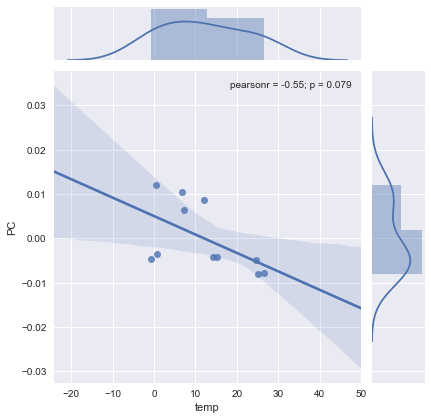

In [22]:
f = sns.jointplot(x="temp", y="PC", data=pair_df, kind='reg')
f.savefig(
    '../imgs/pca/pca_jointplot_temp.png',
    bbox_inches='tight', dpi=250)

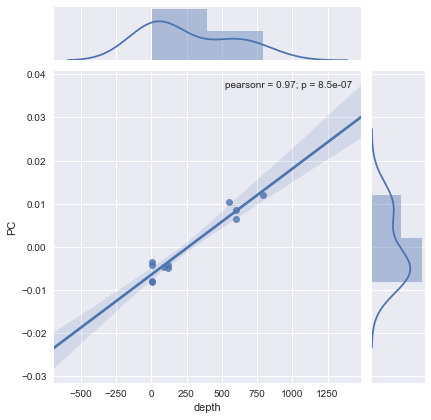

In [23]:
f = sns.jointplot(x="depth", y="PC", data=pair_df, kind='reg')
f.savefig(
    '../imgs/pca/pca_jointplot_depth.png',
    bbox_inches='tight', dpi=250)

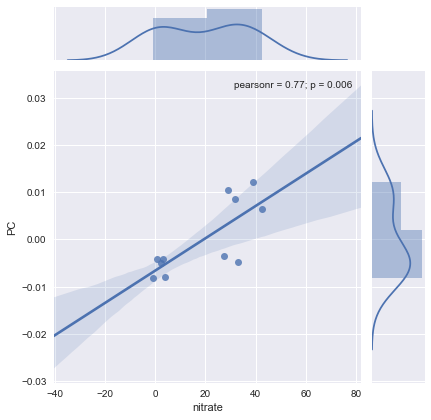

In [24]:
f= sns.jointplot(x="nitrate", y="PC", data=pair_df, kind='reg')
f.savefig(
    '../imgs/pca/pca_jointplot_nitrate.png',
    bbox_inches='tight', dpi=250)

In [27]:
pair_df

,PC,temp,depth,nitrate,zone
0,-0.004941,24.696250,115,2.333576,deep chlorophyll maximum layer
1,0.010476,6.689724,550,29.094100,mesopelagic zone
2,-0.007864,26.544130,5,3.986359,surface water layer
3,-0.004205,15.284298,115,0.732507,deep chlorophyll maximum layer
4,0.006487,7.212238,600,42.532050,mesopelagic zone
5,0.012088,0.458830,790,38.821249,mesopelagic zone
6,0.008569,12.066048,600,31.802451,mesopelagic zone
7,-0.004177,14.280650,5,2.999226,surface water layer
8,-0.003602,0.671080,5,27.501159,surface water layer
9,-0.004694,-0.781540,90,33.109231,deep chlorophyll maximum layer


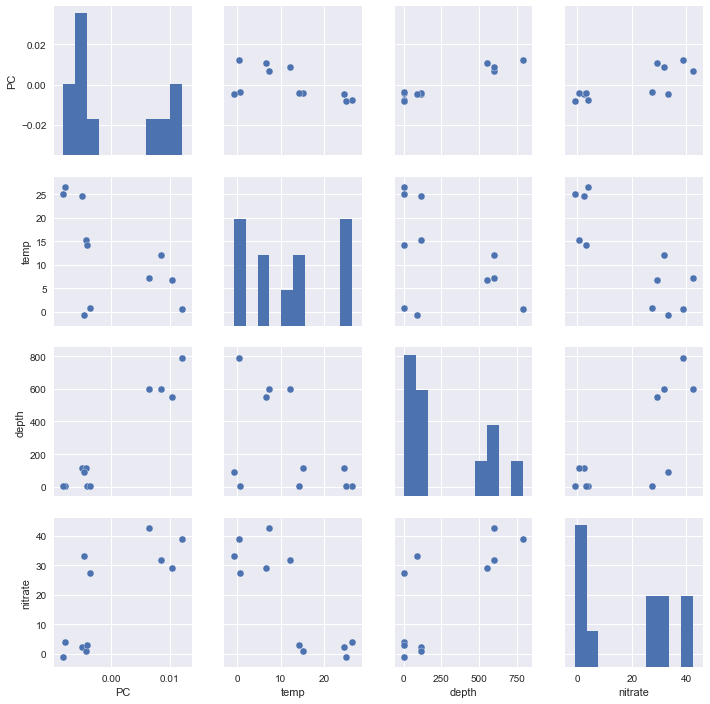

In [25]:
sns.pairplot(pair_df)

In [ ]:
sns.lmplot(x="temp", y="PC", data=pair_df, )

In [ ]:
sns.pairplot(pair_df, kind='reg')

In [ ]:
plt.scatter(x=temp, y=projected)
plt.xlabel('Temp (c)')
plt.ylabel('PC1')
# cbar = plt.colorbar()
# cbar.set_ticks(np.arange(5))
# cbar.ax.set_yticklabels(region_names)

In [ ]:
plt.scatter(x=temp, y=projected)
plt.xlabel('Temp (c)')
plt.ylabel('PC1')
# cbar = plt.colorbar()
# cbar.set_ticks(np.arange(5))
# cbar.ax.set_yticklabels(region_names)

In [ ]:
plt.scatter(
    projected[:, 0], projected[:, 1],
    c=region_codes, edgecolor='none', alpha=0.5,
    cmap=plt.cm.get_cmap('Set1',5))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
cbar = plt.colorbar()
cbar.set_ticks(np.arange(5))
cbar.ax.set_yticklabels(region_names)

## 3D

In [ ]:
from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d import Axes3D

In [ ]:
pca = PCA(n_components=3)
projected = pca.fit_transform(data)

In [ ]:
projected.shape

In [ ]:
ax = plt.axes(projection='3d')

x = projected[:,0]
y = projected[:,1]
z = projected[:,2]

ax.scatter3D(x, y, z, c=region_codes)